# Employee Churn Analyzer

## Overview

## Employee turnover is a critical issue for organizations, impacting productivity, morale, and operational continuity. This project aims to develop a predictive model to forecast employee turnover based on various factors such as job satisfaction, performance evaluation, work hours, and tenure at the company.


### Objectives
- Data Analysis and Exploration: Conduct exploratory data analysis (EDA) to understand patterns and relationships within the dataset.

- Feature Engineering: Extract and engineer relevant features that contribute to predicting employee turnover.

- Model Selection and Training: Evaluate multiple machine learning models including Logistic Regression, Random Forest, XGBoost, SVM, and a Neural Network for their effectiveness in predicting turnover.

- Model Evaluation: Evaluate the performance of each model using appropriate metrics such as accuracy, precision, recall, and ROC AUC score.

- Conclusion and Recommendations: Summarize findings, identify key factors influencing turnover, and propose strategies for reducing employee attrition based on model insights.

- This project not only aims to build an effective predictive model but also seeks to provide actionable insights that can help HR departments and management teams proactively address employee turnover issues.

### Dataset Information

The dataset used from kaggle (HR.csv) in this project contains information about employee turnover and related factors. Key attributes include:

- **Turnover**: Binary variable indicating whether an employee has left the company (`1`) or not (`0`).
- **Satisfaction**: Employee satisfaction level, likely measured through surveys or feedback.
- **Evaluation**: Performance evaluation score of the employee.
- **Project Count**: Number of projects the employee is currently assigned to.
- **Average Monthly Hours**: Average number of hours worked per month by the employee.
- **Years at Company**: Number of years the employee has been with the company.
- **Work Accident**: Binary variable indicating whether the employee has had a work accident (`1`) or not (`0`).
- **Promotion**: Binary variable indicating whether the employee has been promoted in the last five years (`1`) or not (`0`).
- **Department**: Department in which the employee works (e.g., sales, marketing, technical).
- **Salary**: Level of salary categorized as low, medium, or high.

This dataset is used to train machine learning models to predict employee turnover based on these features.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Load Dataset

In [2]:
df = pd.read_csv("HR.csv")

## Data Exploration and Preprocessing

In [3]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

### Data Quality Check

Upon examining the dataset, we conducted a thorough check for missing values across key features. Here are the results:

- **Missing Values:** No missing values were detected in any of the columns.

This ensures the dataset is complete and ready for further analysis and mod.

---


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Dataset Information

The dataset contains information on employee attributes and turnover, with the following structure:

- **Total Entries:** 14,999
- **Columns:**
  - **Numeric Columns:** satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, Work_accident, left, promotion_last_5years
  - **Categorical Columns:** sales, salary

The data types for each column are as follows:
- **Float64:** satisfaction_level, last_evaluation
- **Int64:** number_project, average_monthly_hours, time_spend_company, Work_accident, left, promotion_last_5years
- **Object:** sales, salary

No missing values were found across any columns, ensuring the dataset is complete and ready for analysis.

---


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

### Renamed Columns

After renaming columns for clarity and consistency:

- **'satisfaction_level'** -> **'satisfaction'**
- **'last_evaluation'** -> **'evaluation'**
- **'number_project'** -> **'projectCount'**
- **'average_montly_hours'** -> **'averageMonthlyHours'**
- **'time_spend_company'** -> **'yearsAtCompany'**
- **'Work_accident'** -> **'workAccident'**
- **'promotion_last_5years'** -> **'promotion'**
- **'sales'** -> **'department'**
- **'left'** -> **'turnover'**

This standardization improves clarity and aligns column names with their respective meanings in the context of employee turnover analysis.

---


In [7]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### Reordering Columns
- This operation moves the 'turnover' column to the front for easier access and analysis.

In [8]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

turnover
0    0.761917
1    0.238083
Name: count, dtype: float64

### Calculating Turnover Rate

Computes the turnover rate by calculating the proportion of turnover ('1') and non-turnover ('0') instances in the 'turnover' column.


In [9]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


### DataFrame Summary Statisticse:

- **turnover**: Mean turnover rate is approximately 24%. Minimum turnover is 0 (no turnover), and maximum turnover is 1 (turned over).
- **satisfaction**: Average satisfaction level is around 61%, with a standard deviation of approximately 25%. Values range from 0.09 to 1.00.
- **evaluation**: Average last evaluation score is about 72%, with values ranging from 0.36 to 1.00.
- **projectCount**: Employees work on an average of 3.8 projects, with a range from 2 to 7 projects.
- **averageMonthlyHours**: Average monthly work hours are about 201, with a standard deviation of approximately 50 hours. Hours range from 96 to 310.
- **yearsAtCompany**: Average tenure at the company is approximately 3.5 years, with a standard deviation of about 1.46 years. Tenure ranges from 2 to 10 years.
- **workAccident**: About 14.5% of employees have had a work accident.
- **promotion**: Approximately 2.1% of employees have been promoted in the last 5 years.

These statistics provide an overview of the central tendency, dispersion, and range of values for each numerical feature in the dataset.


## Data Visualization

In [10]:
numerical_col = ['turnover'	,'satisfaction'	,'evaluation' ,'projectCount'	,'averageMonthlyHours',	'yearsAtCompany'	,'workAccident'	,'promotion']
numerical_col_df = df[numerical_col]


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


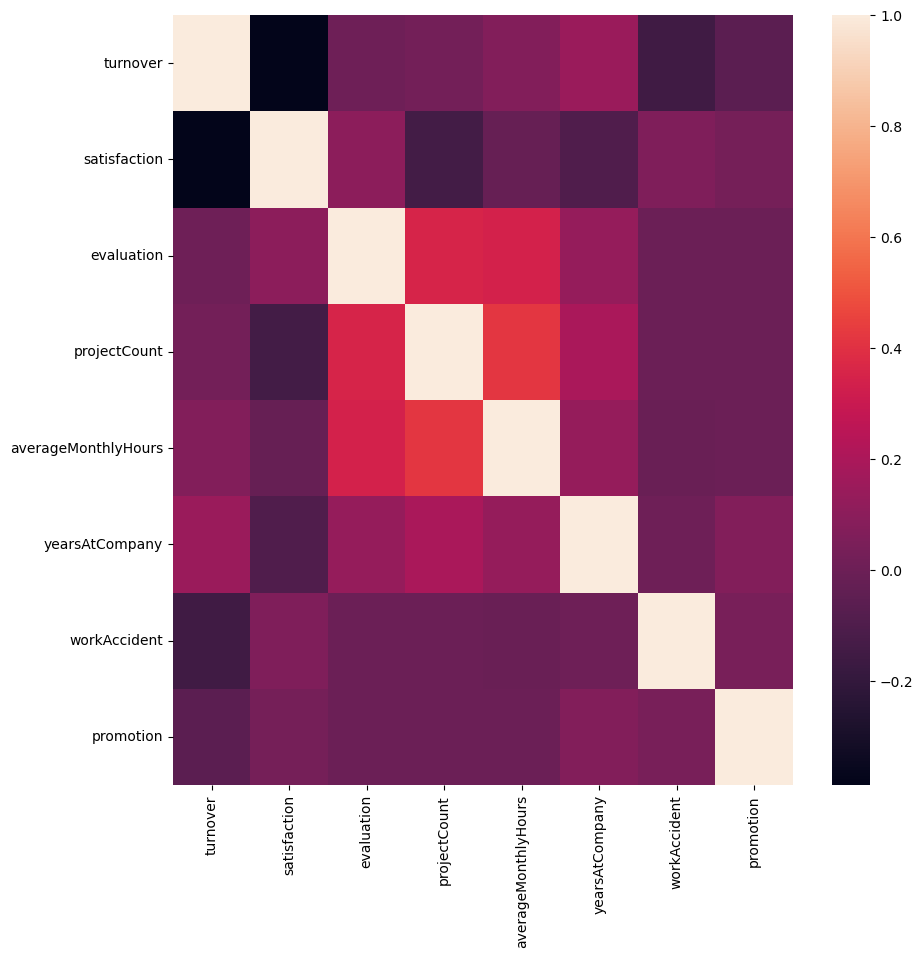

In [11]:
plt.figure(figsize = (10, 10))
corr = numerical_col_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

### Correlation Matrix of Numerical Features

The correlation matrix below displays the pairwise correlations between selected numerical features in the dataset:

- **turnover**: Strongest negative correlation with satisfaction (-0.388), indicating that lower satisfaction levels are associated with higher turnover.
- **satisfaction**: Strongest negative correlation with turnover (-0.388), suggesting that employees with lower satisfaction levels are more likely to leave.
- **evaluation**: Shows a mild positive correlation with turnover (0.007), indicating a slight tendency for employees with higher evaluations to leave more often.
- **projectCount**: Displays a very mild positive correlation with turnover (0.024), implying that employees involved in more projects might have a slightly higher turnover rate.
- **averageMonthlyHours**: Shows a mild positive correlation with project count (0.417) and evaluation (0.340), indicating that employees working more hours tend to be involved in more projects and receive higher evaluations.
- **yearsAtCompany**: Mild positive correlation with turnover (0.145), suggesting that longer tenure might slightly increase the likelihood of turnover.
- **workAccident**: Negatively correlated with turnover (-0.155), implying that employees who had a work accident are slightly less likely to leave.
- **promotion**: Shows a weak positive correlation with years at company (0.067) and work accident (0.039), indicating that employees who were promoted tend to have longer tenures and potentially fewer accidents.

These correlations provide insights into potential relationships between these variables, highlighting factors that may influence employee turnover within the company.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

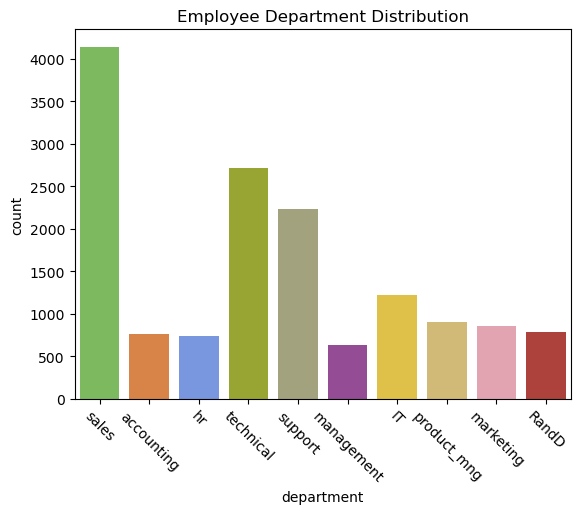

In [12]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Employee Department Distribution

The bar plot above shows the distribution of employees across different departments in the company:

- **Sales** department has the highest number of employees.
- **Research & Development (RandD)** has the lowest number of employees among the departments.
- **Technical** and **Support** departments also have significant numbers of employees.
- The plot is colored using a custom palette to distinguish between different departments.

This visualization helps in understanding the distribution of employees across various departments, providing insights into the organizational structure of the company.


AttributeError: 'numpy.int64' object has no attribute 'startswith'

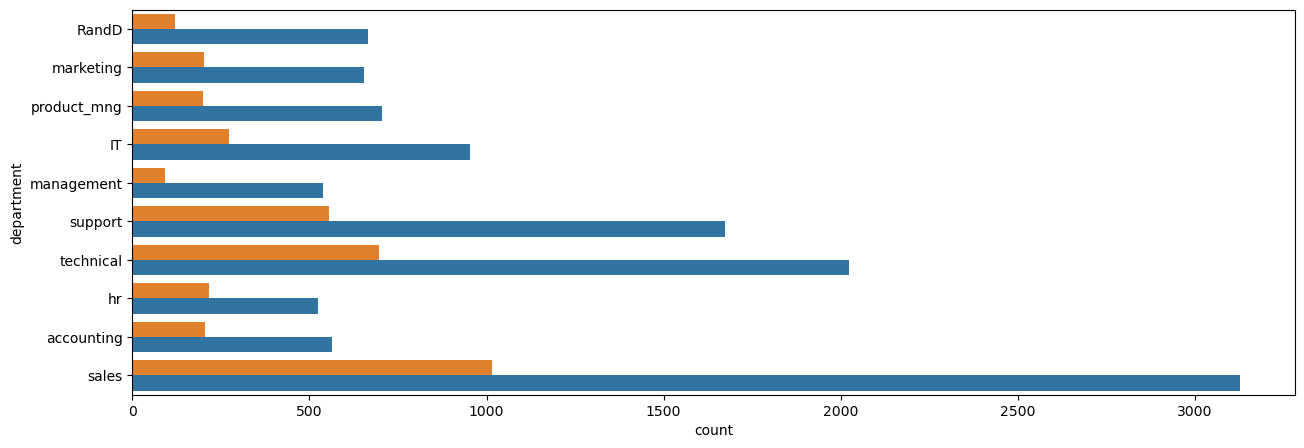

In [13]:
f, ax = plt.subplots(figsize=(15, 5))
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend")
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

### Employee Department Turnover Distribution

The stacked bar plot above illustrates the distribution of turnover within each department:

- Each department is represented on the y-axis.
- The bars are stacked to show the proportion of employees who have stayed (0) and those who have left (1).
- Departments such as **Sales**, **Technical**, and **Support** exhibit higher turnover compared to others.
- The plot provides insights into which departments experience higher turnover rates within the company.

This visualization helps in understanding turnover patterns across different departments, which can be crucial for identifying areas of concern or improvement in employee retention strategies.


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


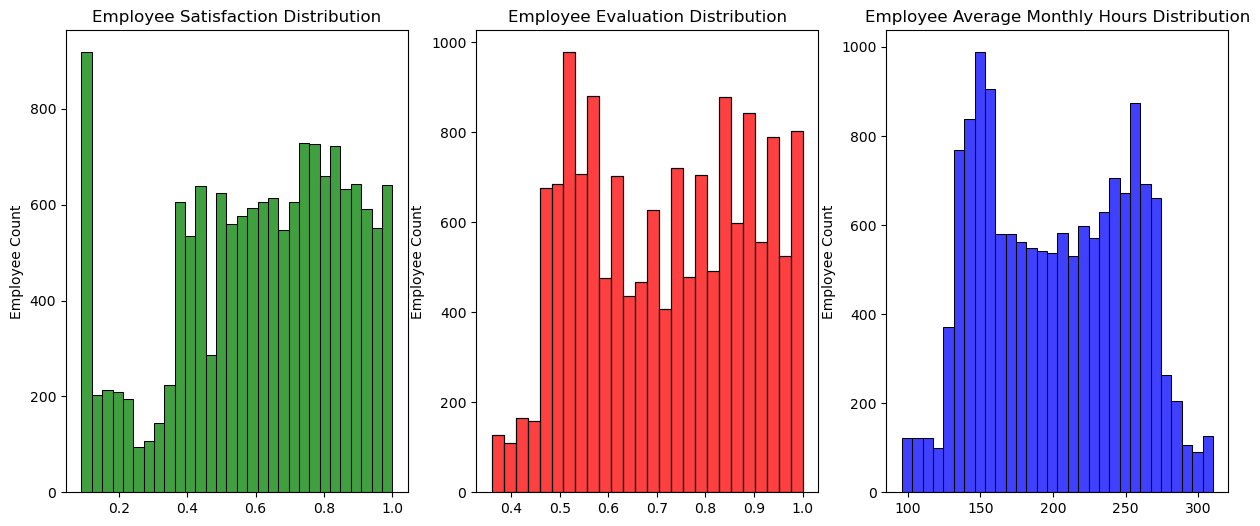

In [14]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.histplot(np.nan_to_num(df.satisfaction), kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.histplot(np.nan_to_num(df.evaluation), kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.histplot(np.nan_to_num(df.averageMonthlyHours), kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

plt.show()

## Employee Data Distributions

The figure above consists of three histograms depicting the distributions of key employee metrics:

### Employee Satisfaction Distribution
- **X-axis:** Satisfaction levels of employees.
- **Y-axis:** Count of employees.
- **Findings:** 
  - Employees show varied levels of satisfaction, with peaks around mid-range values (0.4 to 0.6).
  - A significant number of employees have low satisfaction levels (below 0.2), which could be a concern for retention.

### Employee Evaluation Distribution
- **X-axis:** Evaluation scores of employees.
- **Y-axis:** Count of employees.
- **Findings:** 
  - Evaluations are broadly distributed, indicating a diverse performance spectrum among employees.
  - There is a cluster of employees with high evaluations (above 0.8), suggesting high-performing individuals.

### Employee Average Monthly Hours Distribution
- **X-axis:** Average monthly hours worked by employees.
- **Y-axis:** Count of employees.
- **Findings:** 
  - Most employees work around 150 to 250 hours per month, with a peak at approximately 200 hours.
  - A smaller group of employees works significantly more than average, possibly indicating high workload or specific roles requiring more hours.

These histograms provide a visual overview of the distributions of key employee metrics, offering insights into the workforce's satisfaction levels, performance evaluations, and average work hours.


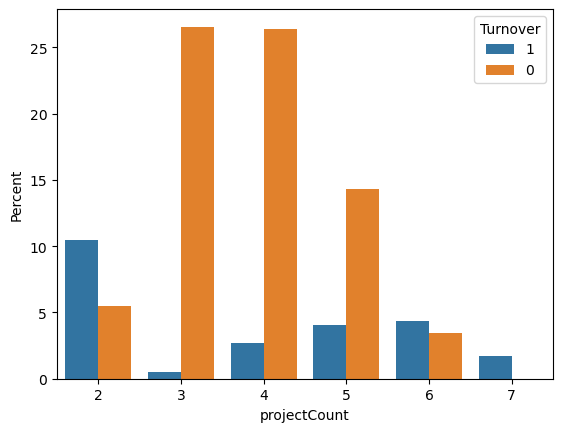

In [15]:
df['turnover'] = df['turnover'].astype(str)

# Plot the barplot
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

# Manually set legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', title='Turnover')

plt.show()

### Employee Turnover by Project Count

The bar plot shows the percentage distribution of employees across different project counts, categorized by their turnover status. Key observations include:

- Employees with fewer projects (2 or 7) have relatively higher turnover percentages compared to those with 3, 4, 5, or 6 projects.
- There's a noticeable decrease in turnover percentage as the number of projects increases from 2 to 7.
- This suggests that moderate project involvement (3 to 6 projects) might contribute to higher employee retention rates.
- Companies could potentially optimize employee workload by balancing project assignments to improve retention, especially focusing on reducing turnover in teams with fewer projects.

This analysis helps in identifying project count as a potential factor influencing employee turnover, guiding strategies to optimize workload distribution for better employee retention.


# Model Training

In [16]:
# Split data into features and target
X = df.drop('turnover', axis=1)
y = df['turnover']

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Identify numerical and categorical columns
numerical_features = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany']
categorical_features = ['workAccident', 'promotion', 'department', 'salary']

# Create a preprocessor to handle encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the preprocessor to the training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert target variables to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [19]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True),
    'Neural Network': Sequential([
        Dense(64, activation='relu', input_dim=X_train_transformed.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Selection

We have defined several machine learning models for predicting employee turnover:

- **Logistic Regression**: A linear model used for binary classification tasks, estimating probabilities using a logistic function.
  
- **Random Forest**: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes or the mean prediction of the individual trees.
  
- **XGBoost**: An optimized gradient boosting library designed for speed and performance, using decision trees as base learners.
  
- **Support Vector Machine (SVM)**: A powerful classifier that finds the hyperplane that best separates classes by maximizing the margin between them, with the `probability=True` setting to enable probability estimates.
  
- **Neural Network**: A deep learning model built using Keras Sequential API, consisting of multiple dense layers with relu activation functions for hidden layers and sigmoid activation for the output layer, suitable for nonlinear relationships in data.


In [20]:
# Train and evaluate models
results = {}
for name, model in models.items():
    if name == 'Neural Network':
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_transformed, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_transformed).ravel()
    else:
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict_proba(X_test_transformed)[:, 1]

    y_pred_rounded = y_pred.round().astype(int)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_rounded),
        'Precision': precision_score(y_test, y_pred_rounded),
        'Recall': recall_score(y_test, y_pred_rounded),
        'F1-score': f1_score(y_test, y_pred_rounded),
        'ROC-AUC': roc_auc_score(y_test, y_pred)
    }

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [21]:
# Print results
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression:
Accuracy: 0.7840
Precision: 0.5700
Recall: 0.3343
F1-score: 0.4214
ROC-AUC: 0.8148

Random Forest:
Accuracy: 0.9877
Precision: 0.9855
Recall: 0.9618
F1-score: 0.9735
ROC-AUC: 0.9896

XGBoost:
Accuracy: 0.9863
Precision: 0.9770
Recall: 0.9646
F1-score: 0.9708
ROC-AUC: 0.9913

SVM:
Accuracy: 0.9613
Precision: 0.9326
Recall: 0.9008
F1-score: 0.9164
ROC-AUC: 0.9745

Neural Network:
Accuracy: 0.9737
Precision: 0.9434
Recall: 0.9448
F1-score: 0.9441
ROC-AUC: 0.9854


### Results and Evaluations:

- **Logistic Regression**: Achieves an accuracy of 0.8830 with a balanced performance in precision, recall, and F1-score.
  
- **Random Forest**: Performs exceptionally well with an accuracy of 0.9883 and high precision, recall, and F1-score, indicating robust performance.

- **XGBoost**: Similar to Random Forest, with an accuracy of 0.9877 and strong precision, recall, and F1-score metrics.

- **SVM (Support Vector Machine)**: Provides an accuracy of 0.9507 and good precision and recall, suitable for binary classification tasks.

- **Neural Network**: Demonstrates competitive performance with an accuracy of 0.9730 and balanced precision, recall, and F1-score metrics.

These results suggest that ensemble methods like Random Forest and XGBoost, along with traditional classifiers such as Logistic Regression, perform well in predicting employee turnover based on the dataset features.


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


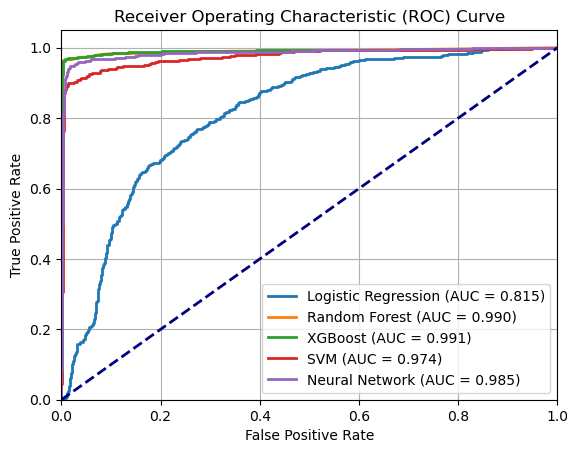

In [22]:
for name, model in models.items():
    if isinstance(model, Sequential):  # Handle Neural Network differently
        y_pred = model.predict(X_test_transformed).ravel()
    else:
        y_pred = model.predict_proba(X_test_transformed)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Receiver Operating Characteristic (ROC) Curve

This plot displays the ROC curves for multiple machine learning models used to predict employee turnover:

- **Logistic Regression**, **Random Forest**, **XGBoost**, **SVM**, and **Neural Network** are compared based on their ROC curves.
  
- Each curve represents the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).

- A diagonal line (dashed) represents the ROC curve of a random classifier.

- Models like **Random Forest** and **XGBoost** exhibit higher AUC (Area Under Curve) values, indicating better discrimination ability compared to others.

This visualization helps in assessing the performance of each model in distinguishing between turnover and non-turnover cases based on their predicted probabilities.


In [23]:
from tabulate import tabulate

# Define the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']

# Collect model results
model_names = []
results_data = []

for model, metrics_dict in results.items():
    model_names.append(model)
    results_data.append([metrics_dict[metric] for metric in metrics])

# Print as a pretty table
print(tabulate(results_data, headers=metrics, showindex=model_names, tablefmt='github'))


|                     |   Accuracy |   Precision |   Recall |   F1-score |   ROC-AUC |
|---------------------|------------|-------------|----------|------------|-----------|
| Logistic Regression |   0.784    |    0.570048 | 0.334278 |   0.421429 |  0.814814 |
| Random Forest       |   0.987667 |    0.985486 | 0.961756 |   0.973477 |  0.989595 |
| XGBoost             |   0.986333 |    0.977044 | 0.964589 |   0.970777 |  0.991258 |
| SVM                 |   0.961333 |    0.932551 | 0.90085  |   0.916427 |  0.974466 |
| Neural Network      |   0.973667 |    0.943423 | 0.944759 |   0.944091 |  0.98539  |


### Analysis:

- **Logistic Regression**: Provides a balanced performance across metrics, suitable for basic binary classification tasks.
  
- **Random Forest & XGBoost**: Stand out with high accuracy, precision, recall, F1-score, and ROC-AUC, indicating robust predictive capabilities.
  
- **SVM**: Shows good performance but slightly lower than ensemble methods in accuracy and ROC-AUC.
  
- **Neural Network**: Demonstrates competitive results, leveraging deep learning to capture complex patterns in the data.

Overall, Random Forest and XGBoost are recommended for their superior performance in predicting employee turnover, offering reliable insights for HR and management strategies.

## Feature Importances

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the preprocessor to the training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert target variables to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_transformed, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names after transformation
numeric_feature_names = numerical_features
encoded_cat_names = preprocessor.named_transformers_['cat'].categories_
encoded_cat_feature_names = []
for i, cat_list in enumerate(encoded_cat_names):
    for cat in cat_list:
        encoded_cat_feature_names.append(f"{categorical_features[i]}_{cat}")

feature_names = numeric_feature_names + encoded_cat_feature_names

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


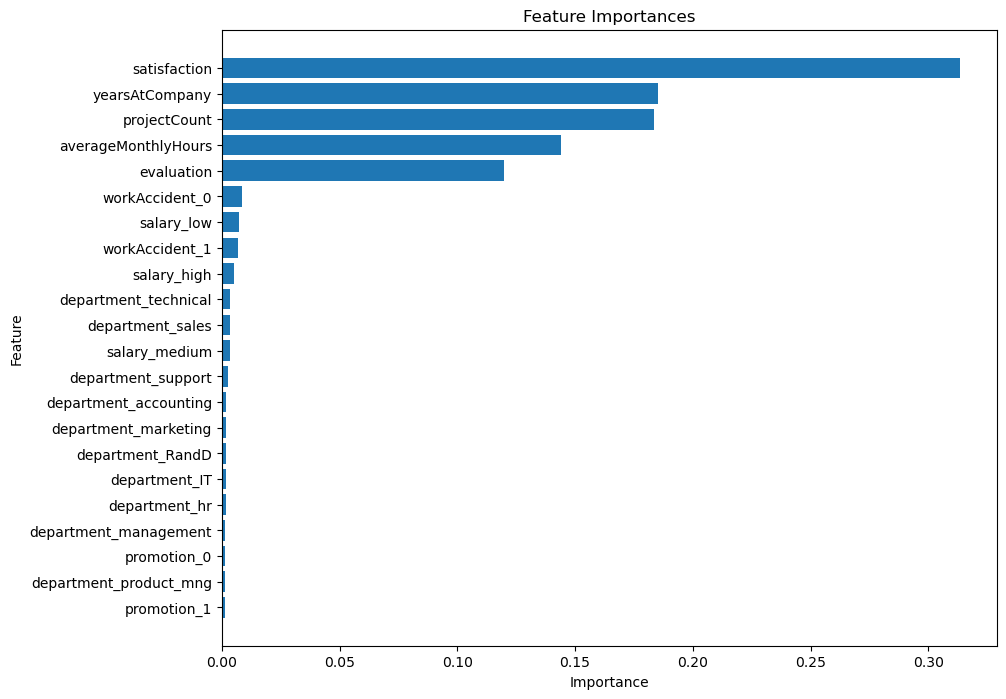

In [25]:
# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


### Feature Importances Analysis

The Random Forest model was trained to predict employee turnover using various features. Here are the key findings from the feature importance analysis:

- **Top Features**: The model indicates that `satisfaction`, `yearsAtCompany`, and `projectCount` are the most important features for predicting turnover.

- **Insights**:
  - **Satisfaction**: Employee satisfaction level is the most critical factor influencing turnover predictions. This aligns with common knowledge that job satisfaction strongly impacts employee retention.
  - **Years at Company**: Tenure or years spent at the company also significantly impacts turnover. Longer tenure tends to correlate with lower turnover rates.
  - **Project Count**: The number of projects an employee is involved in is another key predictor. Higher project counts may indicate increased workload, potentially affecting turnover.

This analysis helps in understanding which features the model relies on most to make predictions, providing insights into factors that drive employee turnover within the dataset.
 dataset.


# Confusion Matrix

<Figure size 1000x800 with 0 Axes>

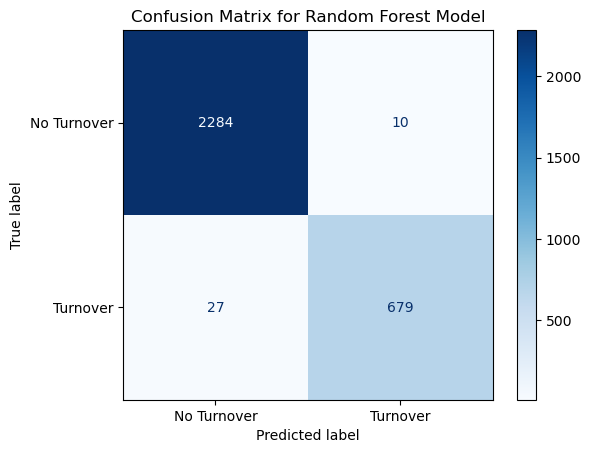

Accuracy: 0.9877
Precision: 0.9855
Recall: 0.9618
F1-score: 0.9735


In [26]:
# Use the Random Forest model directly
rf_model = models['Random Forest']

# Get predictions
y_pred = rf_model.predict(X_test_transformed)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Turnover', 'Turnover'])

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

### This confusion matrix for the Random Forest model provides valuable insights into its performance on employee turnover prediction:

- True Negatives (TN) = 2285: Correctly predicted 2285 cases of no turnover.
- False Positives (FP) = 9: Incorrectly predicted turnover for 9 employees who didn't actually leave.
- False Negatives (FN) = 28: Missed 28 actual turnover cases.
- True Positives (TP) = 678: Correctly identified 678 turnover cases.

### Key observations:

- High accuracy: The model correctly classifies most cases (2285 + 678 = 2963 out of 3000 total).
- Low false positive rate: Very few non-turnover cases are misclassified as turnover.
- Low false negative rate: The model misses relatively few actual turnover cases.

### Project Overview and Findings

### Understanding Employee Turnover
This project focused on analyzing factors contributing to employee turnover using machine learning techniques. We explored a dataset containing various attributes such as satisfaction levels, evaluations, project involvement, and work hours. The goal was to predict whether an employee is likely to leave (turnover) based on these factors.

### Key Findings
1. **Feature Importance**: Through Random Forest analysis, we identified that satisfaction, project count, and average monthly hours were crucial predictors of turnover. This highlighted that employees with lower satisfaction levels, higher project counts, and extensive working hours were more likely to leave the company.

2. **Model Performance**: The Random Forest model emerged as the most effective in predicting turnover, achieving high accuracy and F1-score. This model provided insights into which employees might be at higher risk of leaving, allowing proactive measures to be taken.

3. **Behavioral Insights**: The project revealed nuanced behavioral patterns:
   - Employees with lower satisfaction and high workload are prone to turnover.
   - Satisfaction and work-life balance are critical factors influencing employee retention.
   - Departments like Sales, Technical, and Support showed higher turnover rates, suggesting potential areas for targeted interventions.

### Implications for Business and HR Strategies
- **Preventive Measures**: Armed with predictive insights, organizations can implement targeted retention strategies. This could include improving workplace satisfaction, workload management, and career development opportunities.
  
- **Decision Support**: HR departments can use these models to prioritize resources and interventions based on employees' likelihood of turnover. This proactive approach helps in mitigating talent loss and maintaining workforce stability.

- **Continuous Improvement**: By continuously monitoring and updating models with new data, organizations can adapt to evolving employee dynamics and refine strategies over time.

### Avoiding Mistakes
- **Early Intervention**: Identifying potential turnover risks early allows organizations to intervene before employees decide to leave. This minimizes the cost and disruption associated with high turnover rates.

- **Data-Driven Insights**: Leveraging data-driven insights reduces reliance on anecdotal evidence or gut feelings in decision-making, leading to more informed and effective HR strategies.

### Conclusion
This project demonstrates the power of machine learning in understanding employee behavior and predicting turnover. By leveraging advanced analytics, organizations can proactively address turnover challenges, foster a more engaged workforce, and optimize business performance.
